<a href="https://colab.research.google.com/github/HelenLit/CourseWork-PlayRoom-2022/blob/master/Fashion-MNIST_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   3   0  23  87   0   3   1   4   0  19  95   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0  75 153   8   0   0   0   0  90 149   8   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0  62 129 118  46   3   3  74 121 116  11   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0  69 118 108 126 125 129 125 108 115  13   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0  64 113  90  93  97  95  95 102 123  16   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0  59 115  92  92  90  98  97  93 116  18   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0  49 121  88  90  90  90  92  85 123  19   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0  42 143  93  92  88  87  88  85 116  11   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0  46 133  87 

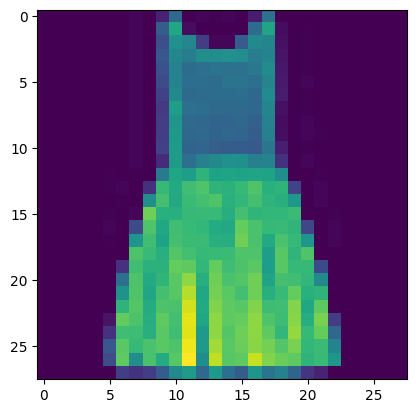

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 30001

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check the loss
    if(logs.get('loss') < 0.4):
      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
myCallback = myCallback()

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=10, callbacks=myCallback)
#Usually 2 epoch is enough

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4784 - accuracy: 0.8299
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.3615 - accuracy: 0.8673
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3618 - accuracy: 0.8673


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8684


[0.363935261964798, 0.868399977684021]

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 3ms/step
[6.5106753e-05 5.5902183e-07 4.3589948e-06 2.8398691e-07 6.9751131e-06 7.4122101e-02 2.5161071e-05 3.3296995e-02 1.2878648e-03 8.9119059e-01]


In [ ]:
print(test_labels[0])

9
